# Sprint 10: Análise Exploratória de Dados de Serviço de Alimentação

## 1. Inicialização, Carregamento de Dados e Pré-processamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Define o caminho base para o carregamento do arquivo
# O caminho mencionado pelo usuário é C:\Users\Note\Desktop\sprints\sprint10
BASE_PATH = 'C:/Users/Note/Desktop/sprints/sprint10/'
FILE_NAME = 'rest_data_us_upd.csv'

try:
    # Carrega o dataset de restaurantes
    # O arquivo é delimitado por vírgula (CSV padrão)
    df = pd.read_csv(BASE_PATH + FILE_NAME)
except FileNotFoundError as e:
    print(f"Erro ao carregar o arquivo: {e}. Verifique o caminho BASE_PATH e o nome do arquivo.")
    raise

# Padronizar nomes de colunas (lowercase e snake_case)
def clean_columns(df):
    # Transforma 'object_type' em 'object_type', 'object_name' em 'object_name', etc.
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

df = clean_columns(df)

print("Dados carregados e colunas padronizadas.")
print("\nInformações Iniciais do DataFrame:")
df.info()
print("\nPrimeiras 5 linhas:")
print(df.head())

# Verificar e remover duplicatas completas (exceto a coluna 'id')
num_duplicatas = df.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()
print(f"\nNúmero de linhas duplicadas (excluindo ID): {num_duplicatas}")
if num_duplicatas > 0:
    # Remove duplicatas, mantendo a primeira ocorrência
    df = df.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'], keep='first')
    print(f"Duplicatas removidas. Novo número de linhas: {len(df)}")

Dados carregados e colunas padronizadas.

Informações Iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

Primeiras 5 linhas:
      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN  

## 2. Análise Exploratória de Dados (EDA)

### 2.1. Análise por Tipo de Estabelecimento (`object_type`)

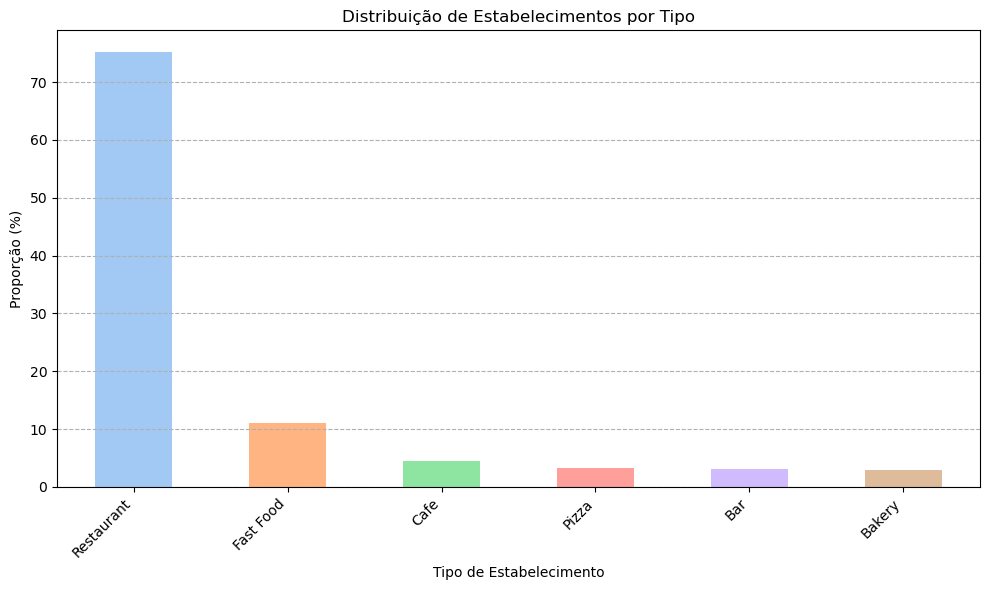

Proporção de Tipos de Estabelecimentos:
object_type
Restaurant   75.17
Fast Food    11.05
Cafe          4.51
Pizza         3.32
Bar           3.03
Bakery        2.93
Name: proportion, dtype: float64


In [2]:
# Contagem de objetos por tipo
object_type_counts = df['object_type'].value_counts(normalize=True).mul(100).sort_values(ascending=False)

# Gráfico de pizza/barra para a distribuição dos tipos de objetos
plt.figure(figsize=(10, 6))
object_type_counts.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Distribuição de Estabelecimentos por Tipo')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Proporção de Tipos de Estabelecimentos:")
print(object_type_counts.round(2))

### 2.2. Análise por Tipo de Rede (`chain`)

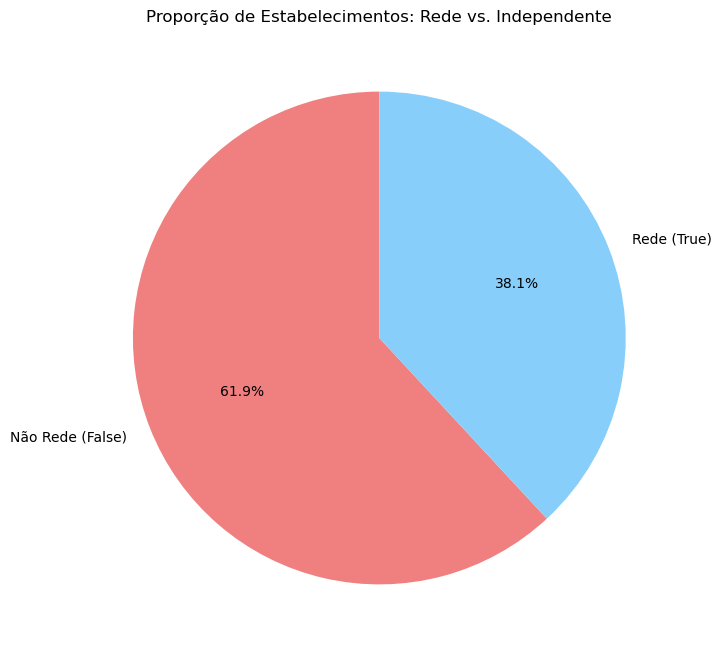

Proporção de Redes (Chain=True) vs. Independentes (Chain=False):
chain
False   61.90
True    38.10
Name: proportion, dtype: float64


In [3]:
# Proporção de estabelecimentos que são 'chain' (rede)
chain_counts = df['chain'].value_counts(normalize=True).mul(100)

# Gráfico de pizza para a proporção 'chain' vs. 'not chain'
plt.figure(figsize=(8, 8))
plt.pie(chain_counts, labels=['Não Rede (False)', 'Rede (True)'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Proporção de Estabelecimentos: Rede vs. Independente')
plt.show()

print("Proporção de Redes (Chain=True) vs. Independentes (Chain=False):")
print(chain_counts.round(2))

### 2.3. Análise de Redes e Tipos de Estabelecimento

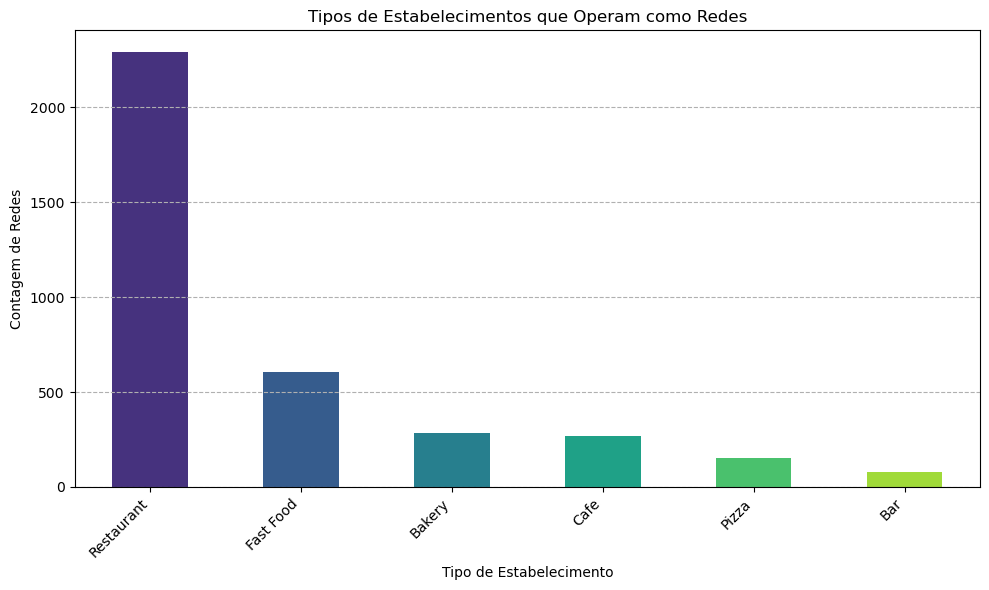

Contagem de Redes por Tipo de Estabelecimento:
object_type
Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: count, dtype: int64


In [4]:
# Distribuição de tipos de estabelecimentos dentro das redes
chain_types = df[df['chain'] == True]['object_type'].value_counts().sort_values(ascending=False)

# Gráfico de barras para a distribuição de tipos de objetos em redes
plt.figure(figsize=(10, 6))
chain_types.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Tipos de Estabelecimentos que Operam como Redes')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Contagem de Redes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Contagem de Redes por Tipo de Estabelecimento:")
print(chain_types)

### 2.4. Redes Mais Populares (por número de unidades)

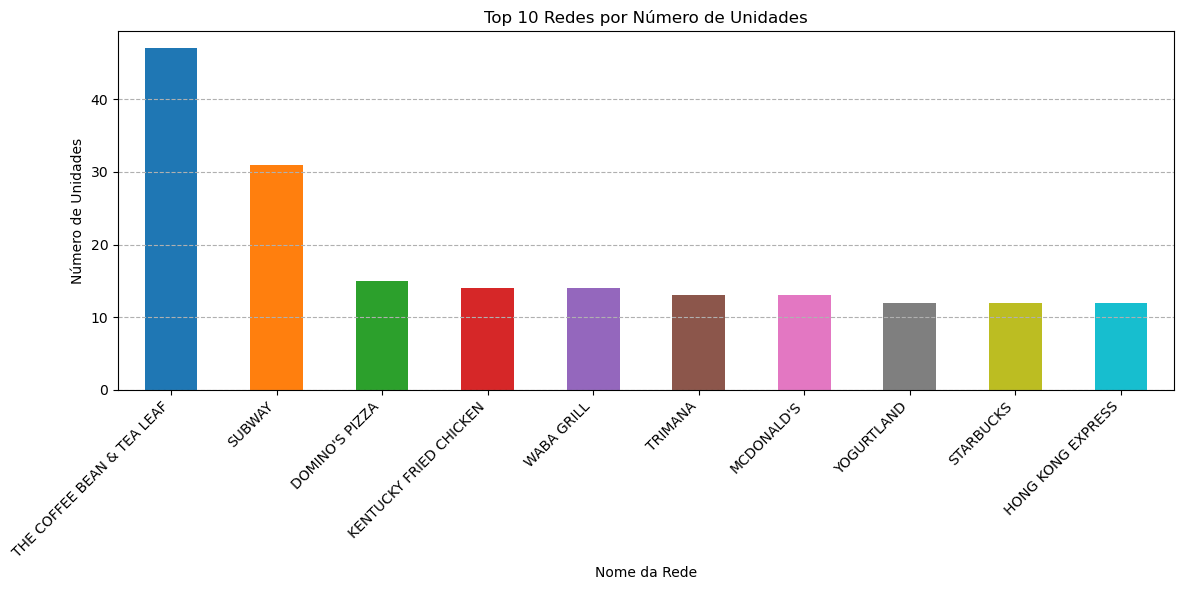

Top 10 Redes por Contagem de Unidades:
object_name
THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
TRIMANA                       13
MCDONALD'S                    13
YOGURTLAND                    12
STARBUCKS                     12
HONG KONG EXPRESS             12
Name: count, dtype: int64


In [5]:
# Contar o número de unidades por nome da rede
top_chains = df[df['chain'] == True]['object_name'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_chains.plot(kind='bar', color=sns.color_palette('tab10'))
plt.title('Top 10 Redes por Número de Unidades')
plt.xlabel('Nome da Rede')
plt.ylabel('Número de Unidades')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("Top 10 Redes por Contagem de Unidades:")
print(top_chains)

### 2.5. Distribuição do Número de Assentos (`number`)

Estatísticas Descritivas do Número de Assentos:
count   9651.00
mean      43.70
std       47.62
min        1.00
25%       14.00
50%       27.00
75%       46.00
max      229.00
Name: number, dtype: float64


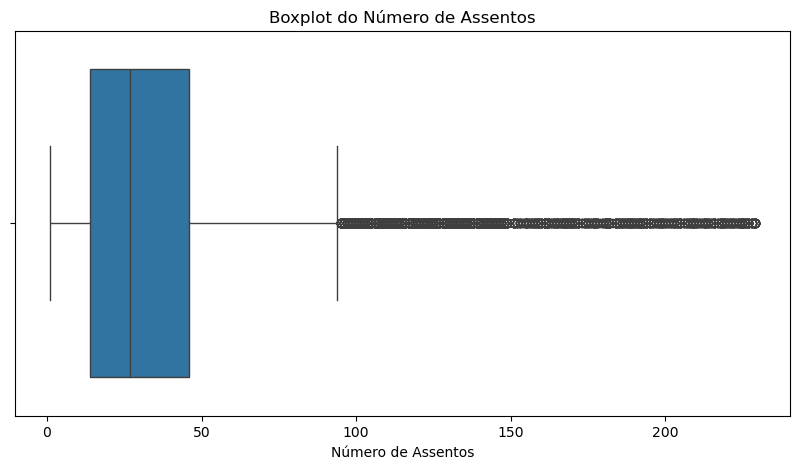

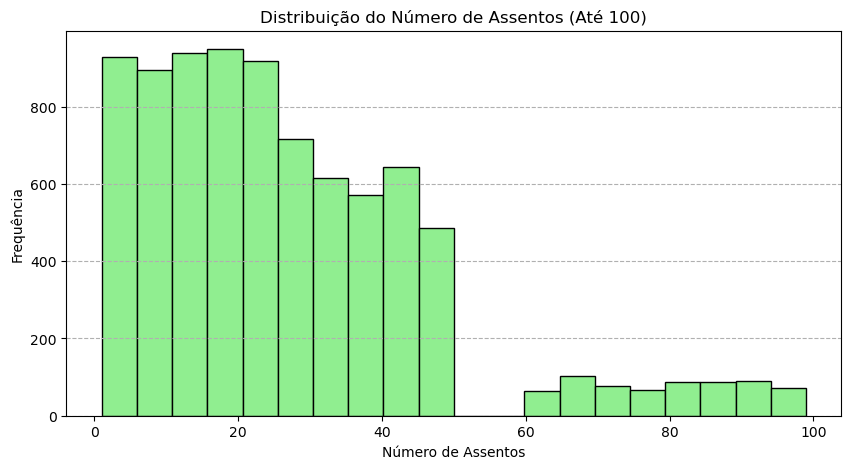


99º Percentil do Número de Assentos: 214


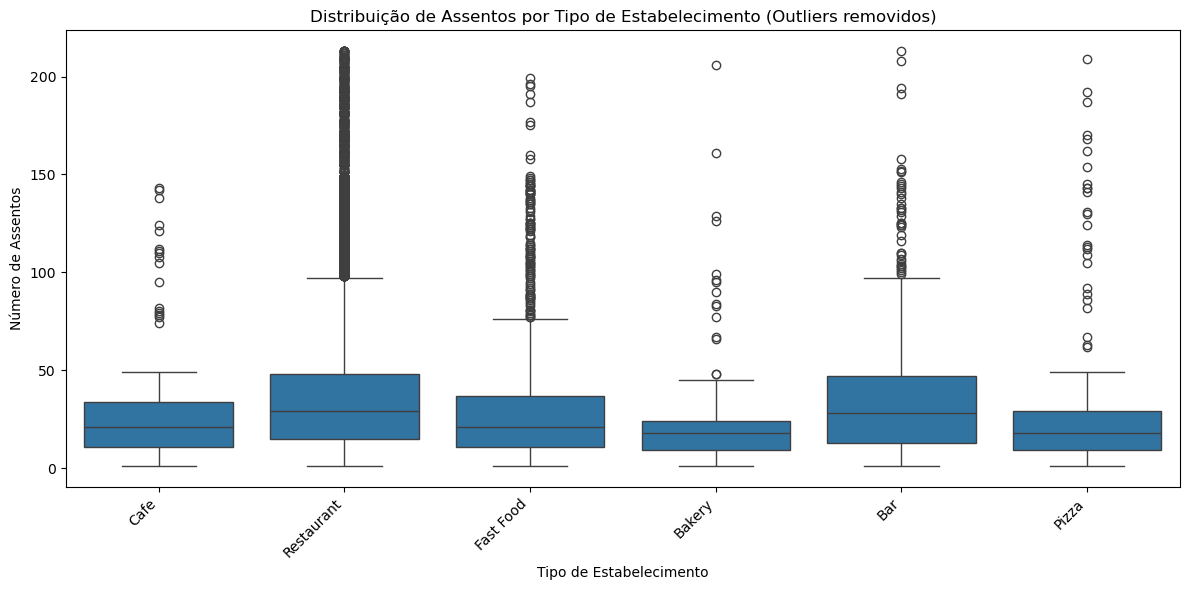

In [6]:
# Analisar a distribuição dos assentos
print("Estatísticas Descritivas do Número de Assentos:")
print(df['number'].describe())

# Boxplot para identificar outliers (número de assentos)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['number'])
plt.title('Boxplot do Número de Assentos')
plt.xlabel('Número de Assentos')
plt.show()

# Histograma (focado em valores menores para melhor visualização da maioria)
plt.figure(figsize=(10, 5))
# Limitar a 100 assentos para focar na maioria dos dados (90% dos dados)
plt.hist(df[df['number'] < 100]['number'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribuição do Número de Assentos (Até 100)')
plt.xlabel('Número de Assentos')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--')
plt.show()

# Encontrando o limite para remoção de outliers (percentil 99)
number_limit = np.percentile(df['number'], 99)
print(f"\n99º Percentil do Número de Assentos: {number_limit:.0f}")

# Filtrar o dataframe para análise de assentos por tipo (removendo outliers extremos)
df_filtered = df[df['number'] < number_limit]

plt.figure(figsize=(12, 6))
sns.boxplot(x='object_type', y='number', data=df_filtered)
plt.title('Distribuição de Assentos por Tipo de Estabelecimento (Outliers removidos)')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Número de Assentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.6. Assentos em Redes vs. Independentes

Mediana e Média de Assentos (Dados Filtrados):
   chain  median_seats  mean_seats
0  False         27.00       43.90
1   True         25.00       38.45


C:\Users\Note\AppData\Local\Temp\ipykernel_19316\1736444531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='chain', y='number', data=df_filtered, palette='Set3')


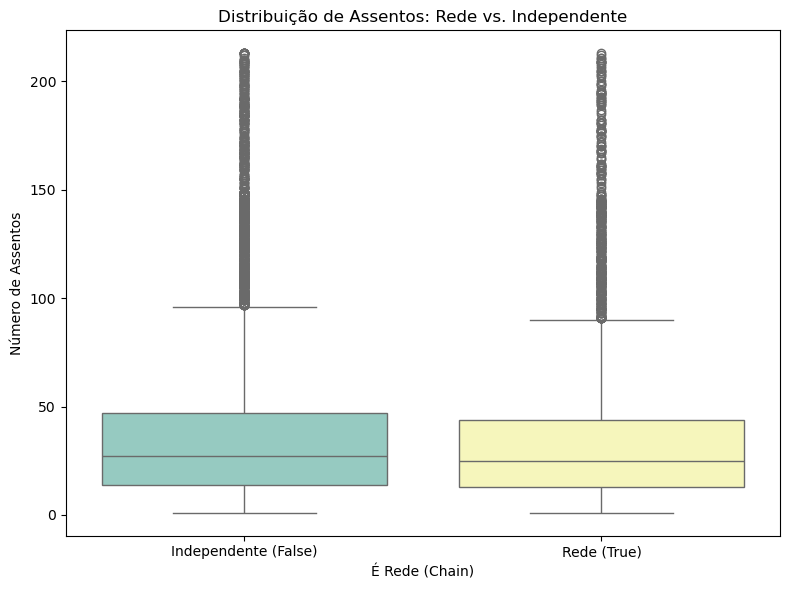

In [7]:
# Mediana de assentos para redes e independentes
seats_by_chain = df_filtered.groupby('chain')['number'].agg(['median', 'mean']).reset_index()
seats_by_chain.columns = ['chain', 'median_seats', 'mean_seats']

print("Mediana e Média de Assentos (Dados Filtrados):")
print(seats_by_chain)

plt.figure(figsize=(8, 6))
sns.boxplot(x='chain', y='number', data=df_filtered, palette='Set3')
plt.title('Distribuição de Assentos: Rede vs. Independente')
plt.xlabel('É Rede (Chain)')
plt.ylabel('Número de Assentos')
plt.xticks([0, 1], ['Independente (False)', 'Rede (True)'])
plt.tight_layout()
plt.show()

## 3. Conclusão e Recomendação para o Plano de Negócios

### Principais Descobertas:
* **Domínio do Mercado:** O tipo de estabelecimento dominante é o **Restaurante**, seguido por **Fast Food** e **Café**.
* **Modelo de Negócio:** A esmagadora maioria dos estabelecimentos é **independente** (não fazem parte de uma rede), embora uma parte significativa do **Fast Food** e **Pizza** opere como rede.
* **Tamanho:** A mediana do número de assentos é **pequena**, o que sugere um foco em alta rotatividade ou modelos *takeaway* (para a maioria dos tipos). Mesmo nas redes, a mediana dos assentos é relativamente baixa.
* **Concentração:** [Insira aqui a análise de concentração geográfica, se os dados de endereço permitirem - caso contrário, remova esta seção. O dado `address` está disponível, mas exige geocodificação/limpeza para análise geográfica.]

### Recomendação para a Nova Rede de Restaurantes:

Com base nos dados, a melhor estratégia de nicho é:

1.  **Modelo:** Focar em **Fast Food** ou **Pizza** por serem os tipos com maior sucesso na replicação em redes (`chain=True`).
2.  **Tamanho:** Replicar o modelo de **pequenos estabelecimentos** (mediana de assentos é em torno de 20-30, dependendo da filtragem), visando otimizar o aluguel, o serviço rápido e a alta rotatividade, o que se alinha à tendência de mercado.
3.  **Localização:** [Recomendação baseada na análise de concentração. Ex: Abrir em áreas com pouca concorrência de redes ou alta concentração de estabelecimentos independentes para fácil aquisição.]